<a target="_blank" href="https://colab.research.google.com/github/Yagami11111/Hotel-booking-Analysis/blob/main/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression, ElasticNet
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import randint, chi2_contingency
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import plotly.express as px
import folium
from sklearn.decomposition import PCA
import warnings

In [2]:
# Load the dataset
hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
print(hotel.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


# Exploratory Data Aalysis

In [782]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [731]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [732]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Preprocessing

In [733]:
#check if there are any missing values
missing_data = hotel.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

company     112593
agent        16340
country        488
children         4
dtype: int64

In [734]:
# Drop the 'company' column as most of the data are missing
hotel.drop(columns='company', inplace=True)

# Replace missing values in 'agent' with 0
hotel['agent'].fillna(0, inplace=True)

# Replace missing values in 'country' with "Unknown"
hotel['country'].fillna("Unknown", inplace=True)

# Drop the rows with  missing values in 'children'
hotel.dropna(subset=['children'], inplace=True)

In [735]:
hotel.isnull().sum().sum()

0

In [736]:
hotel.duplicated().sum()

32001

In [737]:
#Drop duplicate values
hotel.drop_duplicates(inplace=True)
hotel.duplicated().sum()

0

In [738]:
#Check number of adr elements greater than 400, potentially outliers
ADR=pd.DataFrame(hotel.loc[hotel['adr']>400,'adr'])
ADR

,adr
13142,450.00
13391,437.00
15083,508.00
39155,426.25
39568,402.00
48515,5400.00
103912,451.50
111403,510.00


In [739]:
#Check for meaningless values
hotel.loc[(hotel['children'] == 0) & (hotel['adults'] == 0) & (hotel['babies'] == 0), ['adults', 'children','babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [740]:
# The booking is meaning less if 'children', 'hotel', 'babies' are all equal to zero,
# remove the rows where adr is outlier as well
filter = (hotel['children'] == 0) & (hotel['adults'] == 0) & (hotel['babies'] == 0) | (hotel['adr'] <= 0)|(hotel['adr'] >= 400)
hotel = hotel[~filter]

#Drop the column'reservation_status' as it provide same information as 'is_canceled'
hotel.drop(columns='reservation_status', inplace=True)

In [741]:
#Convert reservation date into datetime datatype
#Combine all arrival time column into one new new column with datetime datatype
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

hotel['arrival_date'] = pd.to_datetime(hotel.arrival_date_year.astype(str) +
'/' + hotel.arrival_date_month.astype(str) + '/' + hotel.arrival_date_day_of_month.astype(str))

hotel.drop(columns=["arrival_date_week_number", "arrival_date_year",
"arrival_date_month", "arrival_date_day_of_month"],inplace=True, axis=1)

In [742]:
hotel

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,0.0,0,Transient,75.00,0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,304.0,0,Transient,75.00,0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,No Deposit,240.0,0,Transient,98.00,0,1,2015-07-03,2015-07-01
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,0,No Deposit,0.0,0,Transient,107.00,0,0,2015-07-03,2015-07-01
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,...,0,No Deposit,303.0,0,Transient,103.00,0,1,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,0,No Deposit,394.0,0,Transient,96.14,0,0,2017-09-06,2017-08-30
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,0,No Deposit,9.0,0,Transient,225.43,0,2,2017-09-07,2017-08-31
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,0,No Deposit,9.0,0,Transient,157.71,0,4,2017-09-07,2017-08-31
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,0,No Deposit,89.0,0,Transient,104.40,0,0,2017-09-07,2017-08-31


# Visual Exploratory Data Analysis

plot relevant charts of multiple variables and provide useful insights for users

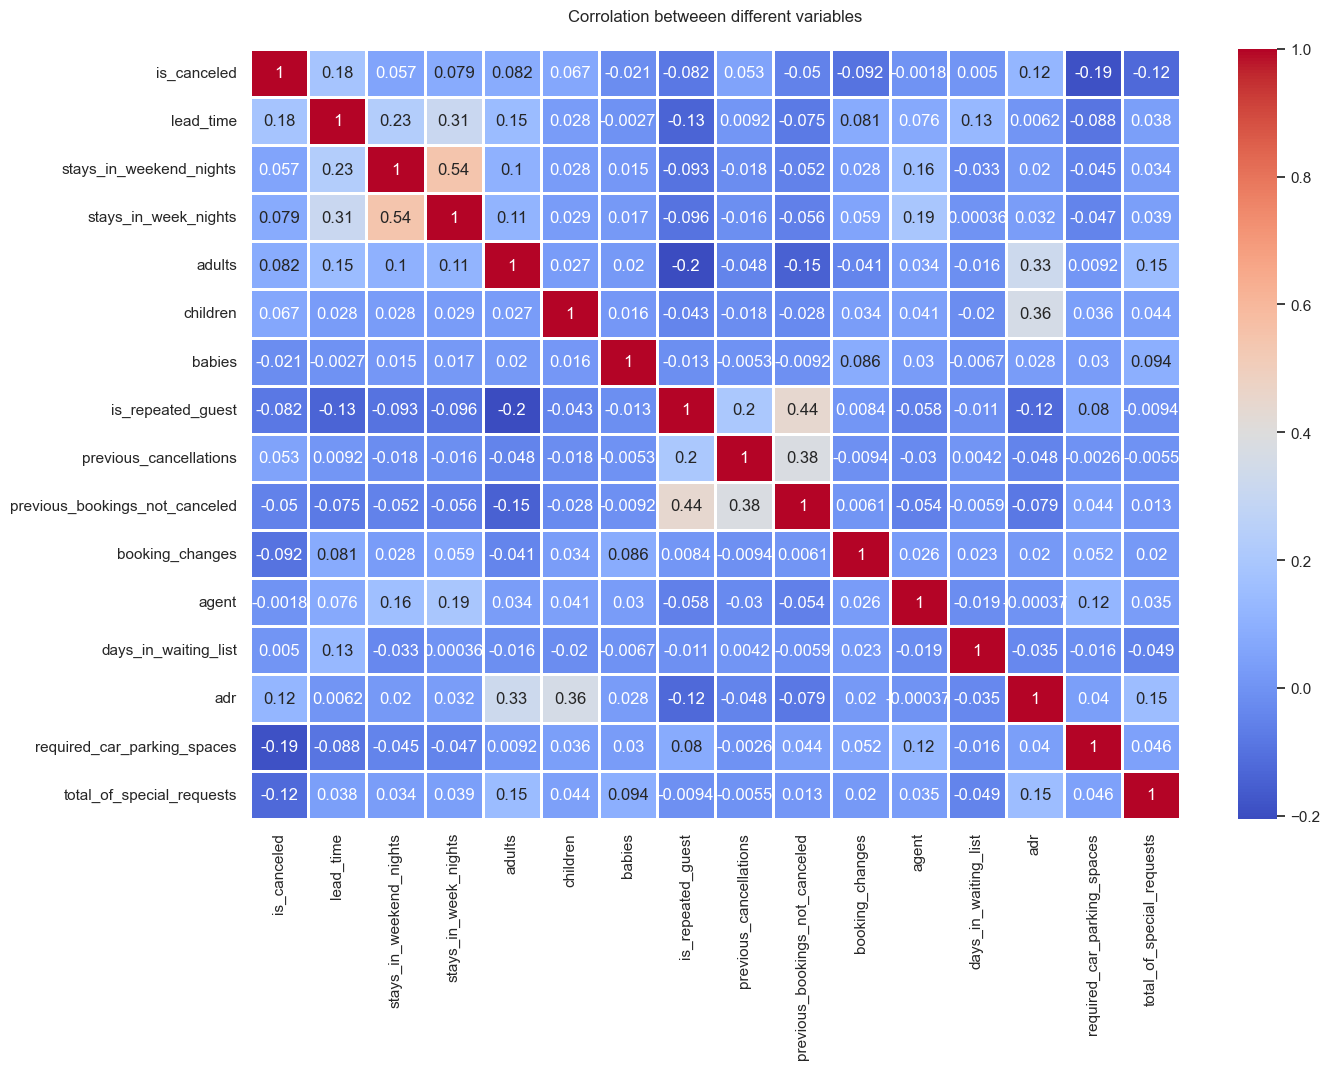

In [743]:
#plot a heatmap to check corrolation between variables
plt.figure(figsize = (15, 10))
corr = hotel.corr()
ax = sns.heatmap(corr, annot=True, linewidths=1, cmap="coolwarm")
ax.set_title("Corrolation betweeen different variables", pad=20)
plt.show()

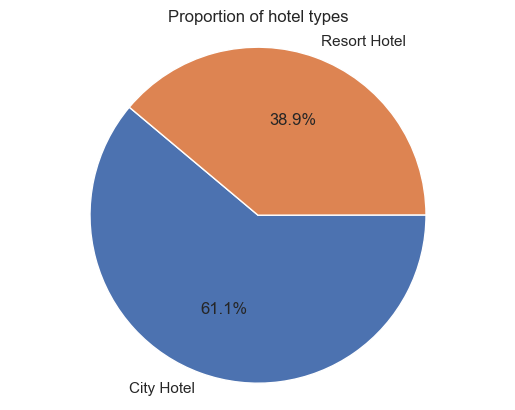

In [744]:
#plot pie chart to see the proportion of each hotel type
hotel_type_sum = hotel.groupby(['hotel']).size()
df_hotel_type_sum = hotel_type_sum.to_frame(name='sum').T
df_hotel_type_proportion = df_hotel_type_sum.div(df_hotel_type_sum.sum(axis=1), axis=0)

plt.figure()
plt.pie(df_hotel_type_proportion.loc['sum'], labels=df_hotel_type_proportion.columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of hotel types')
plt.show()

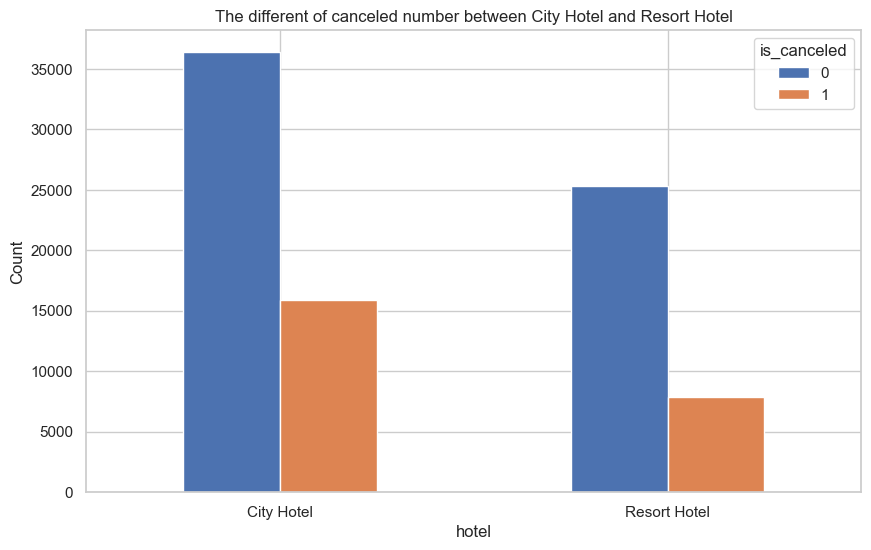

In [745]:
#plot bar chart to see how many resevations were canceled in each type of hotel
count_canceled_data = hotel.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

# Draw a bar chart
ax = count_canceled_data.plot(kind='bar', figsize=(10, 6))

ax.set_ylabel('Count')
ax.set_title('The different of canceled number between City Hotel and Resort Hotel')
plt.xticks(rotation=0)
plt.show()

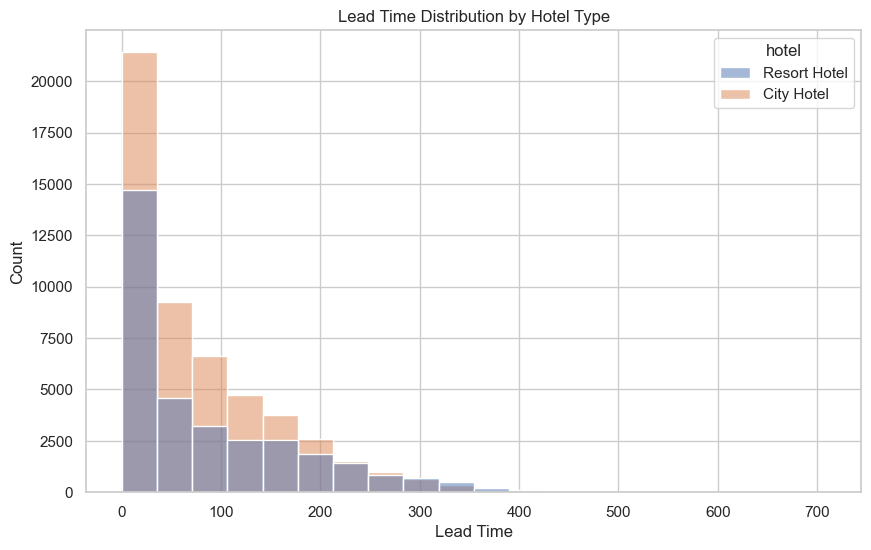

In [746]:
#plot overlapping barchart to check the distribution of lead time
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=hotel, x='lead_time', hue='hotel', bins=20, kde=False, common_norm=False)

# Set the title and labels
ax.set_title('Lead Time Distribution by Hotel Type')
ax.set_xlabel('Lead Time')
ax.set_ylabel('Count')

# Show the plot
plt.show()

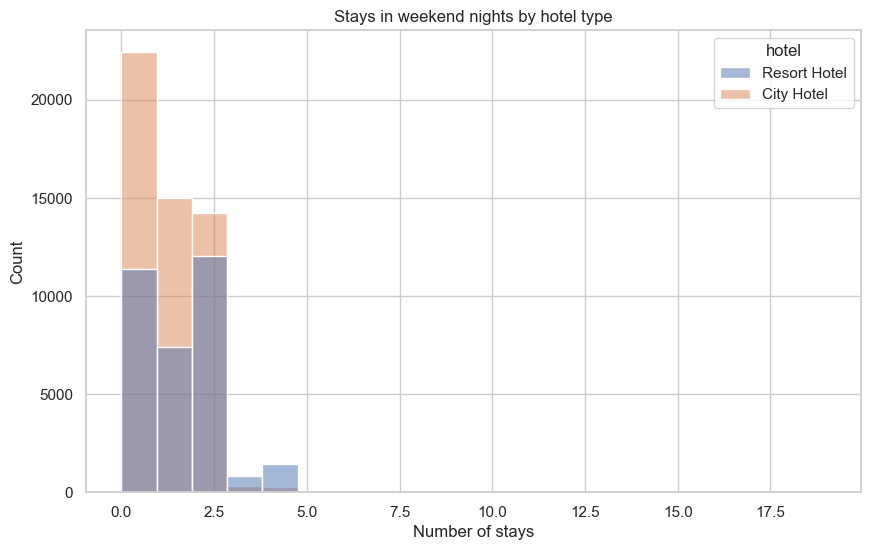

In [747]:
#plot a overlappiing barchart to check the distribution of number of stays in weekend nights
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=hotel, x='stays_in_weekend_nights', hue='hotel', bins=20, kde=False, common_norm=False)

# Set the title and labels
ax.set_title('Stays in weekend nights by hotel type')
ax.set_xlabel('Number of stays')
ax.set_ylabel('Count')

# Show the plot
plt.show()

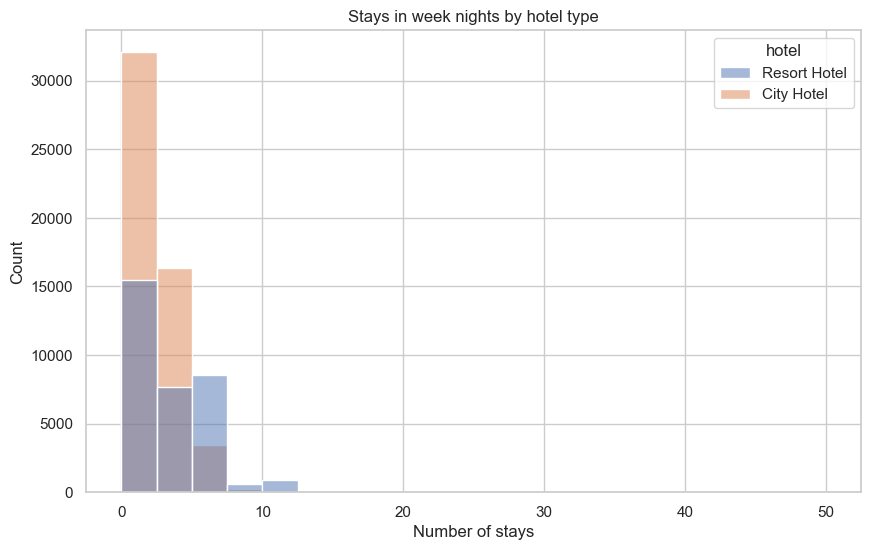

In [748]:
#plot a overlappiing barchart to check the distribution of number of stays in weekday nights
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=hotel, x='stays_in_week_nights', hue='hotel', bins=20, kde=False, common_norm=False)

# Set the title and labels
ax.set_title('Stays in week nights by hotel type')
ax.set_xlabel('Number of stays')
ax.set_ylabel('Count')

# Show the plot
plt.show()

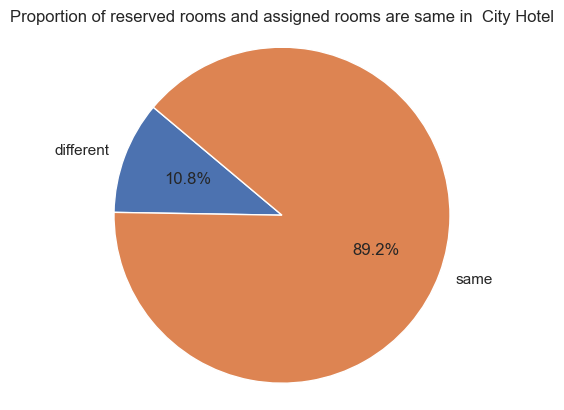

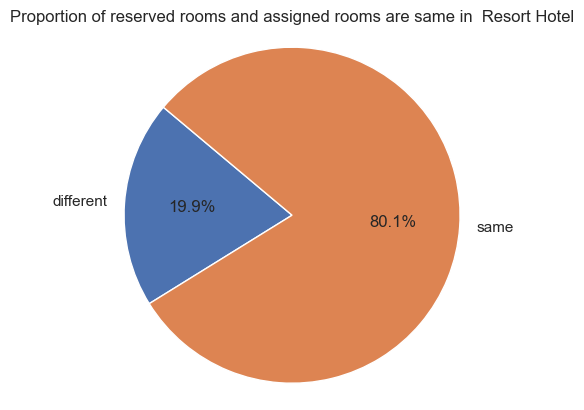

In [749]:
# Calculate the proportion of the same and different types between reserved rooms and assigned rooms in each categories
hotel_rooms = hotel.copy()
hotel_rooms['same'] = hotel_rooms['reserved_room_type'] == hotel_rooms['assigned_room_type']
summary = hotel_rooms.groupby(['hotel', 'same']).size().unstack(fill_value=0)
summary = summary.div(summary.sum(axis=1), axis=0)

# Draw pies for each type
for category in summary.index:
    plt.figure()
    plt.pie(summary.loc[category], labels=['different','same'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Proportion of reserved rooms and assigned rooms are same in  {category}')
    plt.show()

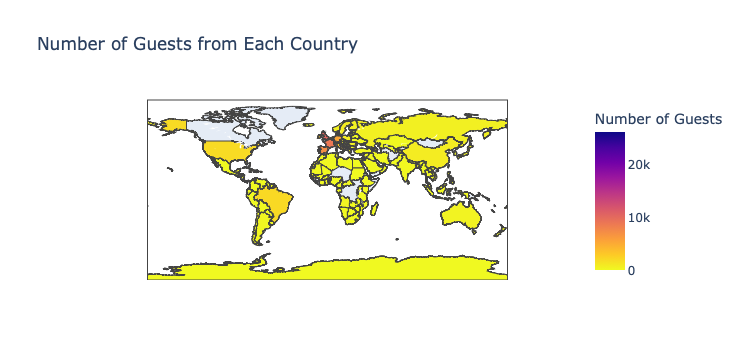

In [750]:
# Calculate the number of guests from each country
country_guests = hotel['country'].value_counts().reset_index()
country_guests.columns = ['country', 'Number of Guests']

#Create the choropleth map
fig = px.choropleth(country_guests,
                    locations='country',
                    color='Number of Guests',
                    title='Number of Guests from Each Country',
                    color_continuous_scale='Plasma_r')
# Show the plot
fig.show()

Text(0.5, 1.0, 'Average Daily Rate per Person by Month')

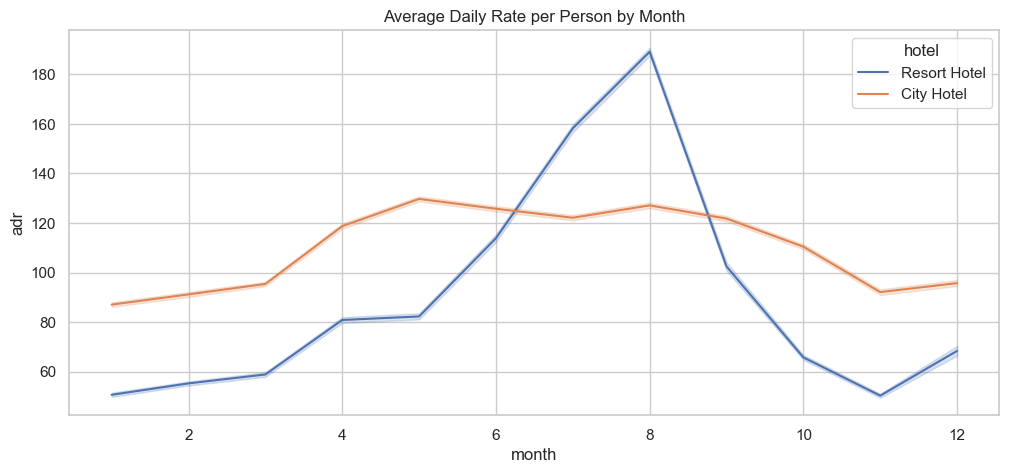

In [751]:
#create line plot too see which month is most expensive for reservation
# Resizing plot
plt.figure(figsize=(12,5))

monthly_rate=hotel.copy()
monthly_rate['month']=hotel['arrival_date'].dt.month
# Calculating average daily rate per person
ax = sns.lineplot(monthly_rate, x='month', y='adr', hue='hotel')
ax.set_title('Average Daily Rate per Person by Month')

# Machine learning

In [752]:
# Encoding categorical features
label_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

encoder = LabelEncoder()

for column in label_columns:
    hotel[column] = encoder.fit_transform(hotel[column])

In [753]:
hotel['reseve_year'] = hotel['reservation_status_date'].dt.year
hotel['reserve_month'] = hotel['reservation_status_date'].dt.month
hotel['reserve_day'] = hotel['reservation_status_date'].dt.day
hotel['arrive_year'] = hotel['arrival_date'].dt.year
hotel['arrive_month'] = hotel['arrival_date'].dt.month
hotel['arrive_day'] = hotel['arrival_date'].dt.day
hotel.drop(columns=['arrival_date','reservation_status_date'], inplace = True)

## PCA

### Bartlett's Sphericity Test

In [754]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [755]:
hotel_pca_numeric = hotel.select_dtypes(exclude=['object', 'datetime64'])
corr_matrix = hotel_pca_numeric.corr()

In [756]:
# Compute the determinant of the correlation matrix
corr_matrix_det = np.linalg.det(corr_matrix)

chi2_stat = -np.log(corr_matrix_det) * (len(hotel_pca_numeric) - 1)
p_value = 1 - chi2_contingency(np.eye(corr_matrix.shape[0]))[1]

chi2_stat, p_value

(1022139.5029788713, 0.7627172555177846)

In [757]:
if (p_value <0.05): print('Barlett Sphericity - Passed')
else: print('Barlett Sphericity - Failed!')

Barlett Sphericity - Failed!


#### The p value is 0.765, which is much higher than 0.05. It indicates that this dataset is not suitable for PCA.

## Regression

### Prediction of Average Daily Rate (`adr`)

In [758]:
#drop out the 'is_canceled' column, which is not related with Average Daily Rate prediction
hotel_adr = hotel.drop(columns=['is_canceled'])

In [759]:
X_adr = hotel_adr.drop('adr', axis=1)
y_adr = hotel_adr['adr']
X_train_adr, X_test_adr, y_train_adr, y_test_adr = train_test_split(X_adr, y_adr, test_size=0.3, random_state=42)

In [760]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and test data
X_train_adr_scaled = scaler.fit_transform(X_train_adr)
X_test_adr_scaled = scaler.transform(X_test_adr)

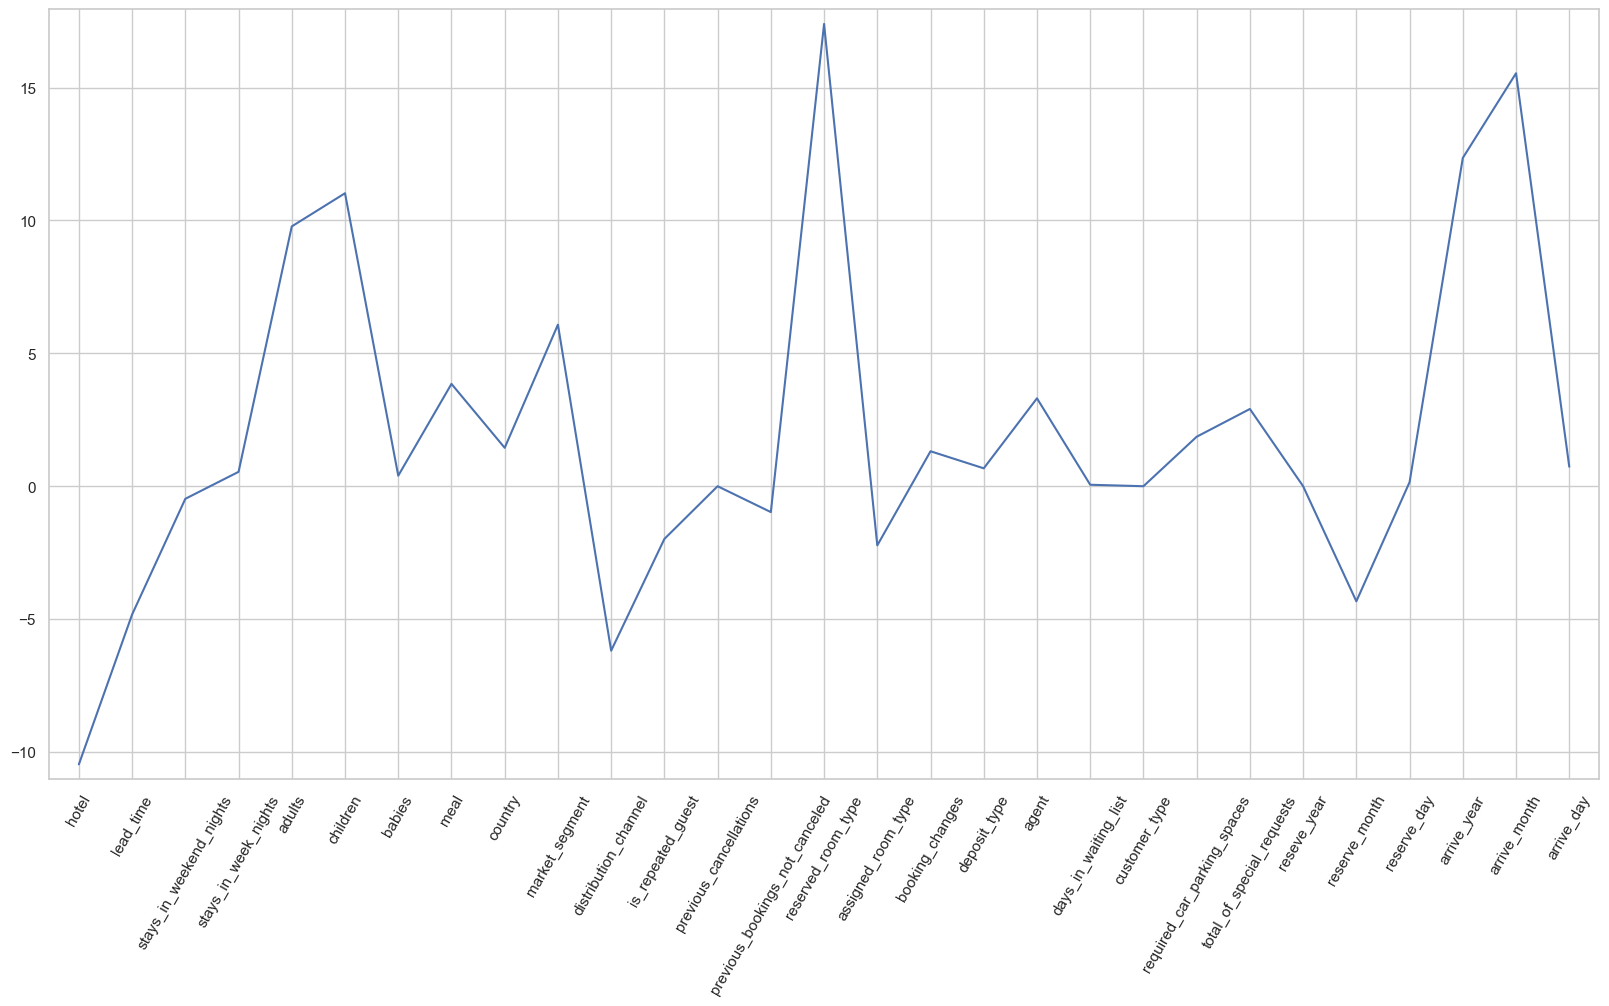

Selected features: Index(['hotel', 'lead_time', 'stays_in_week_nights', 'adults', 'children',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'required_car_parking_spaces',
       'total_of_special_requests', 'reserve_month', 'arrive_year',
       'arrive_month', 'arrive_day'],
      dtype='object')


In [761]:
# Fit a Lasso regression model to do the feature selection
lasso = Lasso(alpha = 0.1).fit(X_train_adr_scaled, y_train_adr)
# Compute and print the coefficients
lasso_coef = lasso.coef_
features = X_train_adr.columns
# Plot the coefficients
plt.figure(figsize=(20,10))
plt.plot(range(len(features)), lasso_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.margins(0.02)
plt.show()

threshold = 0.5

# print feature names with coefficients not near zero
selected_features = features[np.abs(lasso_coef) > threshold]
print("Selected features:", selected_features)

# Get the indices of the features that are selected by Lasso
selected_features_indices = np.where(np.abs(lasso_coef) > threshold)[0]

# Use these indices to select the features from X_train_adr_scaled
X_train_adr_sel= X_train_adr_scaled[:, selected_features_indices]
X_test_adr_sel= X_test_adr_scaled[:, selected_features_indices]

#### Linear regressor

In [762]:
#Creating linear regressor instance
linear_reg = LinearRegression()
linear_reg.fit(X_train_adr_sel, y_train_adr)
y_pred_adr = linear_reg.predict(X_test_adr_sel)
rmse = mean_squared_error(y_test_adr, y_pred_adr, squared=False)
r2 = r2_score(y_test_adr, y_pred_adr)
rmse, r2

(38.29548343196566, 0.41409380103646753)

#### ElasticNet regressor

In [763]:
#Creating ElasticNet regressor instance
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000)
elastic_net.fit(X_train_adr_sel, y_train_adr)
y_pred_adr = elastic_net.predict(X_test_adr_sel)
rmse = mean_squared_error(y_test_adr, y_pred_adr, squared=False)
r2 = r2_score(y_test_adr, y_pred_adr)
rmse, r2

(40.116104862566836, 0.3570599257318998)

#### RandomForest regressor

In [764]:
#Creating Random forest regressor instance
rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(X_train_adr_sel, y_train_adr)
y_pred_adr = rf_reg.predict(X_test_adr_sel)
rmse = mean_squared_error(y_test_adr, y_pred_adr, squared=False)
r2 = r2_score(y_test_adr, y_pred_adr)
rmse, r2

(16.67409952086902, 0.8889246324790305)

## Classification

### Customer cancellation prediction

In [765]:
y_cxl = hotel['is_canceled']
X_cxl = hotel.drop(['is_canceled'], axis = 1)
X_train_cxl, X_test_cxl, y_train_cxl, y_test_cxl = train_test_split(X_cxl, y_cxl, test_size=0.3, random_state=0, stratify=y_cxl)

In [766]:
skb = SelectKBest(mutual_info_classif,k=10)
skb.fit(X_train_cxl, y_train_cxl)

SelectKBest(score_func=<function mutual_info_classif at 0x156eb4f40>)

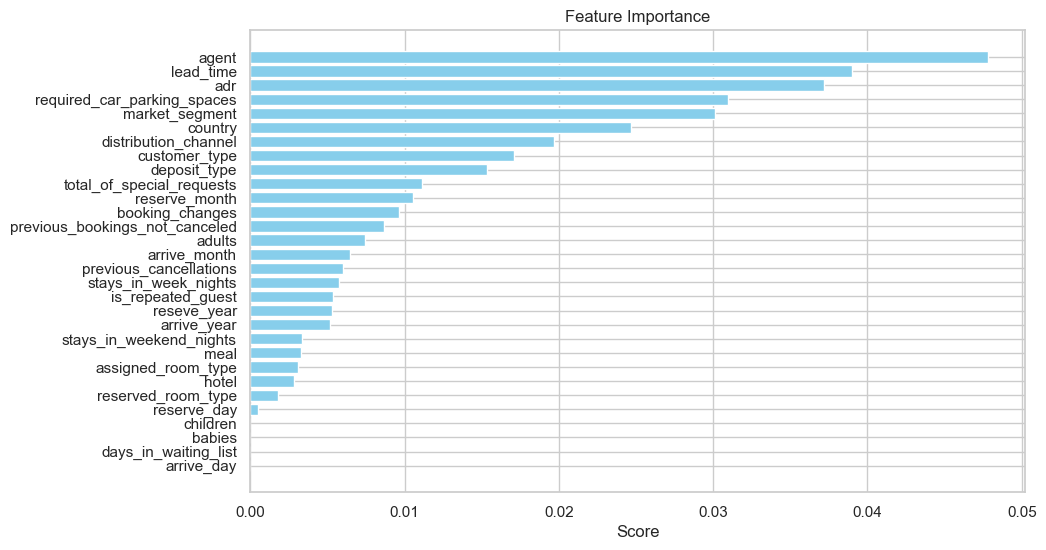

In [767]:
# Creating DataFrame of feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train_can.columns,
    'Score': skb.scores_
})

# Sorting the DataFrame based on scores
feature_scores_sorted = feature_scores.sort_values(by='Score')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_sorted['Feature'], feature_scores_sorted['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Feature Importance')
plt.show()

In [768]:
#select the 25 most important features
X_train_cxl_sel=X_train_cxl[X_train_cxl.columns[skb.scores_ >= np.sort(skb.scores_)[-25]]]
X_test_cxl_sel =X_test_cxl[X_test_cxl.columns[skb.scores_ >= np.sort(skb.scores_)[-25]]]

In [769]:
# Fitting the scaler on the training data and transforming both training and test data
X_train_cxl_scaled = scaler.fit_transform(X_train_cxl_sel)
X_test_cxl_scaled = scaler.transform(X_test_cxl_sel)

#### Logistic regression with hyperparameter tuning using GridSearchCV

In [770]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, scoring='f1',cv=5)
logreg_cv.fit(X_train_cxl_scaled, y_train_cxl)

print("Tuned Logistic Regression Parameters:", logreg_cv.best_params_)
print("Best score is:", logreg_cv.best_score_)

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is: 0.8320374799616941


In [773]:
# Making Evaluations of the models
def model_evaluation(y_test_cxl, y_pred_cxl):
    accuracy = accuracy_score(y_test_cxl, y_pred_cxl)
    conf_matrix = confusion_matrix(y_test_cxl, y_pred_cxl)
    class_report = classification_report(y_test_cxl, y_pred_cxl)
    print("accuracy score is: " , accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print(class_report)
    ConfusionMatrixDisplay(confusion_matrix(y_test_cxl, y_pred_cxl)).plot();
    plt.grid(False)

accuracy score is:  0.9171828132912625
Confusion Matrix: 
 [[18495    26]
 [ 2100  5050]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18521
           1       0.99      0.71      0.83      7150

    accuracy                           0.92     25671
   macro avg       0.95      0.85      0.89     25671
weighted avg       0.93      0.92      0.91     25671



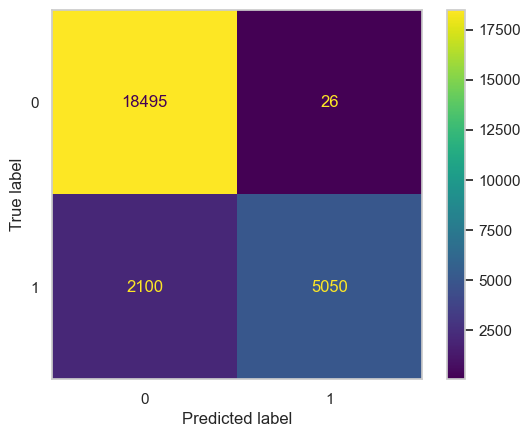

In [774]:
y_pred_cxl = logreg_cv.best_estimator_.predict(X_test_cxl_scaled)

# Evaluating the model
model_evaluation(y_test_cxl, y_pred_cxl)

#### KNN with hyperparameter tuning using GridSearchCV

In [775]:
# Create knn classifier instance
knn = KNeighborsClassifier()
# Define parameter
nn_range = np.arange(50, 5, -4)
knn_cv = GridSearchCV(knn, {'n_neighbors': nn_range}, scoring='f1', cv=5)
knn_cv.fit(X_train_cxl_scaled, y_train_cxl)

print("Tuned k-NN Classifier Parameters:", knn_cv.best_params_)
print("Best score is:", knn_cv.best_score_)

Tuned k-NN Classifier Parameters: {'n_neighbors': 18}
Best score is: 0.6603676893177447


accuracy score is:  0.8415722020957501
Confusion Matrix: 
 [[17639   882]
 [ 3185  3965]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18521
           1       0.82      0.55      0.66      7150

    accuracy                           0.84     25671
   macro avg       0.83      0.75      0.78     25671
weighted avg       0.84      0.84      0.83     25671



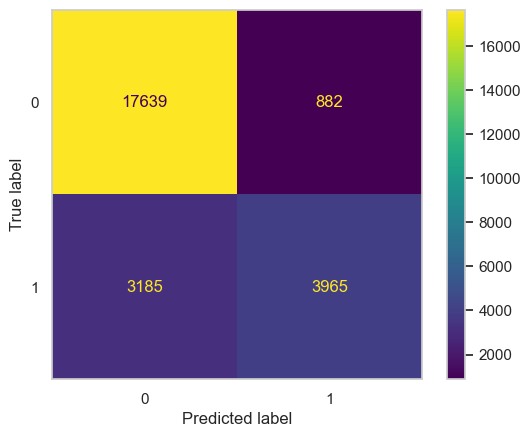

In [776]:
y_pred_cxl = knn_cv.best_estimator_.predict(X_test_cxl_scaled)

# Evaluating the model
model_evaluation(y_test_cxl, y_pred_cxl)

#### Random forest classifier with hyperparameter tuing using RandomizedSearchedCV

In [777]:
param_dist = {"n_estimators": randint(10,200),
              "max_depth": [1, 10, 20, 30, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Training the model
RF = RandomForestClassifier()
RF_cv = RandomizedSearchCV(RF, param_dist,scoring='f1', cv=3)

RF_cv.fit(X_train_cxl_scaled, y_train_cxl)

# Making predictions

print("Best Parameters:", RF_cv.best_params_)
print("Best Cross-Validated Score:", RF_cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'n_estimators': 122}
Best Cross-Validated Score: 0.8321418395012231


accuracy score is:  0.9165984963577578
Confusion Matrix: 
 [[18098   423]
 [ 1718  5432]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     18521
           1       0.93      0.76      0.84      7150

    accuracy                           0.92     25671
   macro avg       0.92      0.87      0.89     25671
weighted avg       0.92      0.92      0.91     25671



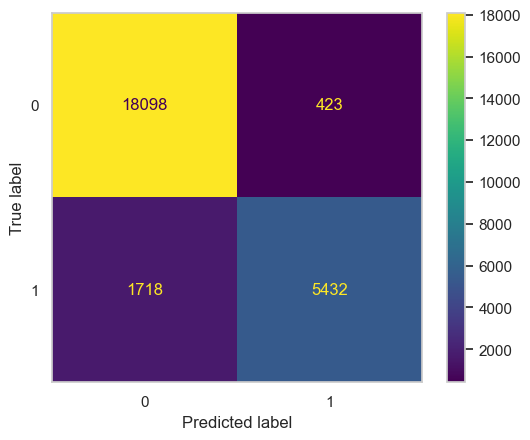

In [778]:
y_pred_cxl = RF_cv.best_estimator_.predict(X_test_cxl_scaled)

# Evaluating the model
model_evaluation(y_test_cxl, y_pred_cxl)